In [151]:
from datetime import datetime
from operator import le
from os import stat
from re import T
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.multioutput import MultiOutputRegressor
from sklearn.ensemble import GradientBoostingRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [152]:
plants_df = pd.read_excel('../dataset/Data.xlsx', sheet_name='plants')
flights_df = pd.read_excel('../dataset/Data.xlsx', sheet_name='flight dates')
planting_df = pd.read_excel('../dataset/Data.xlsx', sheet_name='planting')
planting_df = planting_df.iloc[:1822 , :]
weather_df = pd.read_excel('../dataset/Data.xlsx', sheet_name='weather')

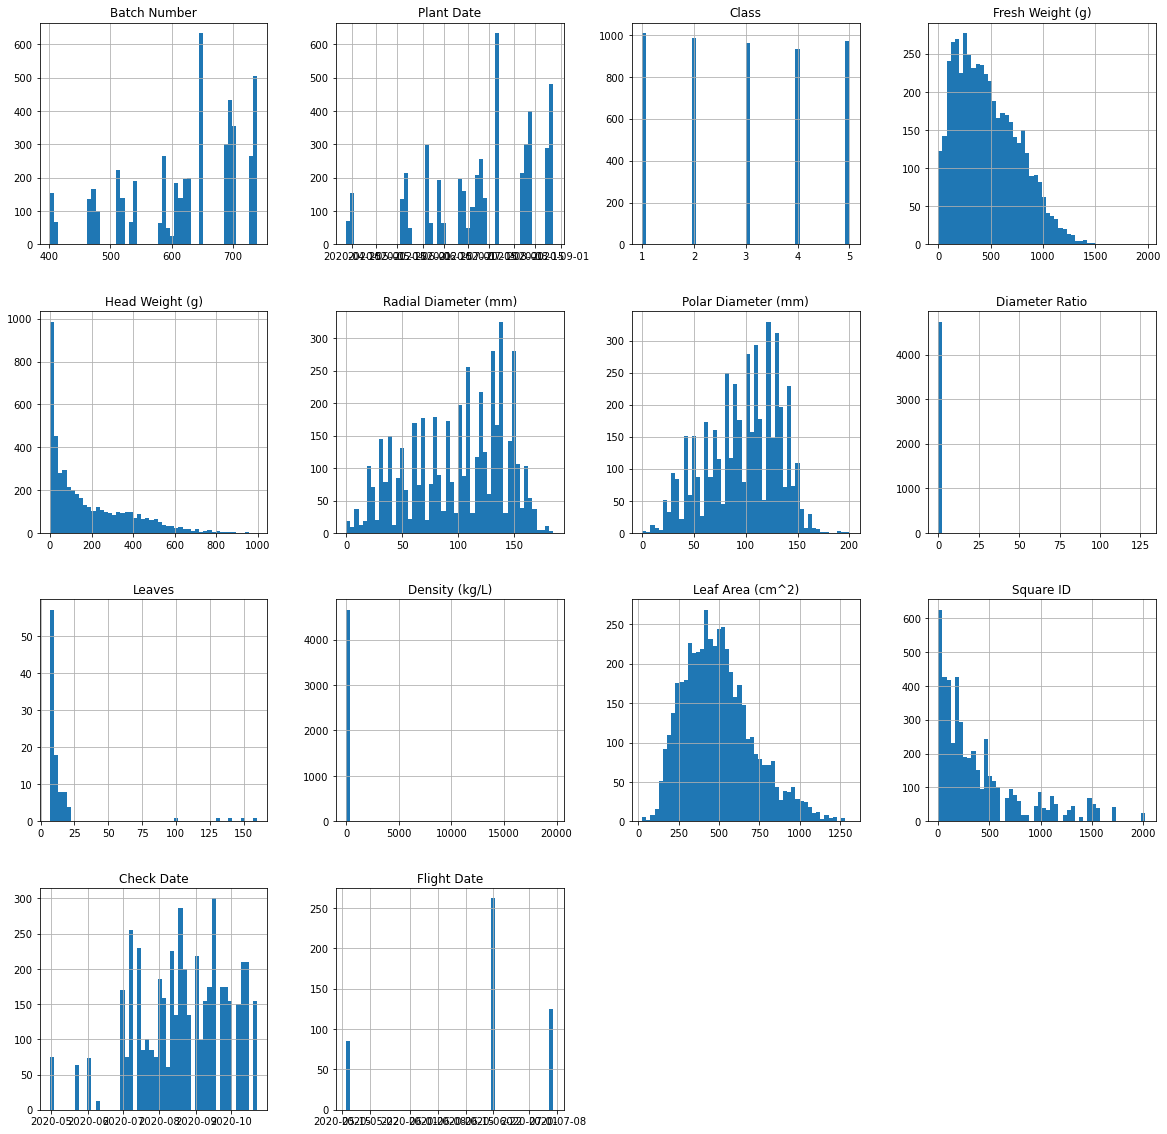

In [153]:
plants_df.hist(bins = 50, figsize=(20,20))
plt.savefig('../plots/plants_hist.pdf')


In [154]:
plants_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Batch Number          4859 non-null   int64         
 1   Plant Date            4685 non-null   datetime64[ns]
 2   Class                 4859 non-null   int64         
 3   Fresh Weight (g)      4858 non-null   float64       
 4   Head Weight (g)       4754 non-null   float64       
 5   Radial Diameter (mm)  4754 non-null   float64       
 6   Polar Diameter (mm)   4754 non-null   float64       
 7   Diameter Ratio        4752 non-null   float64       
 8   Leaves                100 non-null    float64       
 9   Density (kg/L)        4672 non-null   float64       
 10  Leaf Area (cm^2)      4857 non-null   float64       
 11  Square ID             4859 non-null   int64         
 12  Check Date            4859 non-null   datetime64[ns]
 13  Flight Date       

In [172]:
plants_df.describe()

,Batch Number,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID
count,4859.000000,4859.000000,4858.000000,4754.000000,4754.000000,4754.000000,4752.000000,100.000000,4672.000000,4857.000000,4859.000000
mean,621.778349,2.973040,469.627755,183.349811,99.316996,96.546277,1.037744,17.070000,21.730421,495.275067,403.202099
std,92.932427,1.422882,295.819075,187.242036,42.708981,34.909629,1.881858,28.063512,449.793088,212.659323,416.029674
min,402.000000,1.000000,0.632000,0.000000,0.000000,0.000000,0.050000,7.000000,0.014551,25.000000,4.000000
25%,542.000000,2.000000,229.250000,28.000000,65.000000,70.000000,0.900000,8.000000,0.160685,337.000000,94.000000
50%,647.000000,3.000000,426.000000,115.000000,109.000000,100.000000,1.023859,9.500000,0.216925,471.000000,247.000000
75%,698.000000,4.000000,677.000000,304.000000,135.000000,125.000000,1.142857,12.500000,0.293362,620.000000,529.000000
max,739.000000,5.000000,1978.000000,998.000000,185.000000,200.000000,128.000000,160.000000,19671.550966,1305.000000,2019.000000


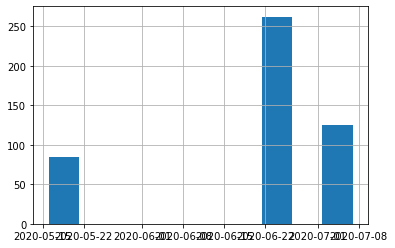

In [155]:
plants_df['Flight Date'].hist()
plt.savefig('../plots/flight_dates_empty.pdf')


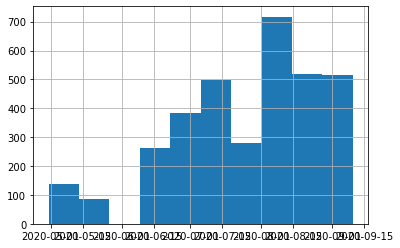

In [156]:
# merge data from plants sheet
df = plants_df.merge(flights_df, on='Batch Number', how='inner').reset_index()

# snippet to fill flight dates
l1 = df['Flight Date_x'].tolist()
l2 = df['Flight Date_y'].tolist()
l3=list()
for cnt, i in enumerate(l1):
    if i is pd.NaT:
        l3.append(l2[cnt])
    else:
        l3.append(i)
df['flight_mod'] = l3
df['flight_mod'].hist()
# df.to_csv('../dataset/plants_flights1.csv')
plt.savefig('../plots/flight_dates.pdf')


In [157]:
# drop the rows for which the plant date is empty
df.dropna(subset=['Plant Date'], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3360 entries, 0 to 3379
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 3360 non-null   int64         
 1   Batch Number          3360 non-null   int64         
 2   Plant Date            3360 non-null   datetime64[ns]
 3   Class                 3360 non-null   int64         
 4   Fresh Weight (g)      3359 non-null   float64       
 5   Head Weight (g)       3262 non-null   float64       
 6   Radial Diameter (mm)  3262 non-null   float64       
 7   Polar Diameter (mm)   3262 non-null   float64       
 8   Diameter Ratio        3261 non-null   float64       
 9   Leaves                95 non-null     float64       
 10  Density (kg/L)        3261 non-null   float64       
 11  Leaf Area (cm^2)      3359 non-null   float64       
 12  Square ID             3360 non-null   int64         
 13  Check Date        

In [158]:
planting_df.info()
df_og = df.copy()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1822 entries, 0 to 1821
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Crop            1821 non-null   object 
 1   Column2         0 non-null      float64
 2   Column3         0 non-null      float64
 3   Plant_Date      1821 non-null   object 
 4   Column1         0 non-null      float64
 5   Region          1821 non-null   float64
 6   Column4         0 non-null      float64
 7   Planting_Batch  1821 non-null   object 
 8   Volume_Planted  1821 non-null   float64
 9   Planting_Wk     1821 non-null   float64
dtypes: float64(7), object(3)
memory usage: 142.5+ KB


In [159]:
df_og = df

In [160]:
# restart point
df = df_og

In [161]:
# split date to day, month and year
df['plant_dates'] = pd.to_datetime(df['Plant Date'])
df['plant_dates_day'] = df['plant_dates'].dt.day
df['plant_dates_month'] = df['plant_dates'].dt.month
df['plant_dates_year'] = df['plant_dates'].dt.year

In [162]:
# create new feature for no of days from plant date to flight date
df['flight_mod'] = pd.to_datetime(df['flight_mod'])
df['plant_dates'] = pd.to_datetime(df['plant_dates'])
df['day_to_check'] = (df['flight_mod'] - df['plant_dates']).dt.days

In [163]:
# split date to day, month and year
df['flight_mod_day'] = df['flight_mod'].dt.day
df['flight_mod_month'] = df['flight_mod'].dt.month
df['flight_mod_year'] = df['flight_mod'].dt.year

In [164]:
#%%
# split date to day, month and year
df['check_date'] = pd.to_datetime(df['Check Date'])
df['check_date_day'] = df['check_date'].dt.day
df['check_date_month'] = df['check_date'].dt.month
df['check_date_year'] = df['check_date'].dt.year

In [165]:
# remove rows that have 'r' in Remove column
df = df[df.Remove != 'r']

In [166]:
# drop columns that are not required
weather_df.drop(columns=['Wind Speed [max]', 'Battery Voltage [last]', 
'Air Temperature [max]', 'Air Temperature [min]', 'Dew Point [min]'], inplace= True)

# convert the date to pandas datetime format
weather_df['dates'] = weather_df['Unnamed: 0'].astype(object)
weather_df['dates'] = pd.to_datetime(weather_df['dates'])
# weather_df.info()

# split the date into day, month and year
weather_df['day'] = weather_df['dates'].dt.day
weather_df['month'] = weather_df['dates'].dt.month
weather_df['year'] = weather_df['dates'].dt.year

In [167]:
# crete seperate dataframes based on the year
weather_df_2014 = weather_df[weather_df['year'] == 2014]
weather_df_2015 = weather_df[weather_df['year'] == 2015]
weather_df_2016 = weather_df[weather_df['year'] == 2016]
weather_df_2017 = weather_df[weather_df['year'] == 2017]
weather_df_2018 = weather_df[weather_df['year'] == 2018]
weather_df_2019 = weather_df[weather_df['year'] == 2019]

# assign name for each of the dataframe
weather_df_2014.name = 'wet_2014'
weather_df_2015.name = 'wet_2015'
weather_df_2016.name = 'wet_2016'
weather_df_2017.name = 'wet_2017'
weather_df_2018.name = 'wet_2018'
weather_df_2019.name = 'wet_2019'

# create lists for making weather feature prediction model
wet_dfs = [
weather_df_2014,
weather_df_2015,
weather_df_2016,
weather_df_2017,
weather_df_2018,
weather_df_2019
]
x_list = []
y_list = []

In [168]:
weather_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2556 entries, 0 to 2555
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Unnamed: 0               2556 non-null   datetime64[ns]
 1   Solar Radiation [avg]    2556 non-null   int64         
 2   Precipitation [sum]      2556 non-null   float64       
 3   Wind Speed [avg]         2556 non-null   float64       
 4   Leaf Wetness [time]      2556 non-null   int64         
 5   Air Temperature [avg]    2556 non-null   float64       
 6   Relative Humidity [avg]  2556 non-null   float64       
 7   Dew Point [avg]          2553 non-null   float64       
 8   ET0 [result]             2490 non-null   float64       
 9   dates                    2556 non-null   datetime64[ns]
 10  day                      2556 non-null   int64         
 11  month                    2556 non-null   int64         
 12  year                     2556 non-

In [169]:
pd.options.mode.chained_assignment = None # to suppress copy warnings
model_list = []
for i in wet_dfs:
    i.drop(columns=['year', 'Unnamed: 0', 'dates', 'ET0 [result]'], inplace=True)
    print(f'proccessed dataframe {i.name}')
    tmp_var = str(i.name)
    i.replace([np.inf, -np.inf], np.nan, inplace=True)
    i.dropna(inplace=True)
    i = i.reset_index()
    tmp_var_x = 'x_'+tmp_var
    tmp_var_y = 'y_'+tmp_var
    tmp_var_y = i.iloc[:,:-2]
    tmp_var_x = i.iloc[:,-2:]
    reg_var = 'model_' + tmp_var
    reg_var = MultiOutputRegressor(GradientBoostingRegressor(random_state=0)).fit(tmp_var_x,tmp_var_y)
    x_list.append(tmp_var_x)
    y_list.append(tmp_var_y)
    model_list.append(reg_var)

proccessed dataframe wet_2014
proccessed dataframe wet_2015
proccessed dataframe wet_2016
proccessed dataframe wet_2017
proccessed dataframe wet_2018
proccessed dataframe wet_2019


In [170]:
start_date = list(zip(df['plant_dates_month'],df['plant_dates_day']))
end_date = list(zip(df['check_date_month'],df['check_date_day']))
day_to_check_lst = df.day_to_check
print(len(start_date), len(end_date), len(day_to_check_lst))

start_wet = []
end_wet = []
mid_wet = []
x_st = []
x_ed = []
x_md = []

3294 3294 3294


In [171]:
# create 3 sets of weather features: 1) at start date (2) mid date (3) end date
for i in range(len(start_date)):
    if i % 1000 == 0:
        print(f'processed {i} rows')
    st_wet = []
    ed_wet = []
    md_wet = []
    a = (datetime(2000, int(start_date[i][0]), int(start_date[i][1])))
    b = (datetime(2000, int(end_date[i][0]), int(end_date[i][1])))
    mid_date = (a + (b - a)/2)
    mid_day = mid_date.day
    mid_month = mid_date.month
    for j in range(len(model_list)):
        st_wet.append(model_list[j].predict([start_date[i]]))
        ed_wet.append(model_list[j].predict([end_date[i]]))
        md_wet.append(model_list[j].predict([[mid_month, mid_day]]))
    x_st.append(np.mean(np.array(st_wet), axis = 0))
    x_ed.append(np.mean(np.array(ed_wet), axis = 0))
    x_md.append(np.mean(np.array(md_wet), axis = 0))



processed 0 rows
processed 1000 rows
processed 2000 rows
processed 3000 rows


In [173]:
'''
create 3 weather features in the following order 
Solar Radiation [avg]
Precipitation [sum]
Wind Speed [avg]
Leaf Wetness [time]
Air Temperature [avg]
Relative Humidity [avg]
Dew Point [avg]
the features are 2d array for each row
'''
df['start_wt'] = x_st
df['end_wt'] = x_ed
df['mid_wt'] = x_md

In [175]:
xtrain_notnull = df.loc[df['Radial Diameter (mm)'].notnull(), df.columns]
xtrain_notnull.dropna(subset=['Polar Diameter (mm)'])
xtrain_notnull.drop(columns=['Leaves','Flight Date_x','Flight Date_y','Remove'], inplace=True)
xtrain_notnull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 25 to 3379
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 3196 non-null   int64         
 1   Batch Number          3196 non-null   int64         
 2   Plant Date            3196 non-null   datetime64[ns]
 3   Class                 3196 non-null   int64         
 4   Fresh Weight (g)      3196 non-null   float64       
 5   Head Weight (g)       3196 non-null   float64       
 6   Radial Diameter (mm)  3196 non-null   float64       
 7   Polar Diameter (mm)   3196 non-null   float64       
 8   Diameter Ratio        3195 non-null   float64       
 9   Density (kg/L)        3195 non-null   float64       
 10  Leaf Area (cm^2)      3196 non-null   float64       
 11  Square ID             3196 non-null   int64         
 12  Check Date            3196 non-null   datetime64[ns]
 13  flight_mod       

In [176]:
# Create correlation matrix
corr_matrix = xtrain_notnull.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]
# corr_matrix
to_drop

['Batch Number', 'plant_dates_month']

In [177]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 3379
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 3294 non-null   int64         
 1   Batch Number          3294 non-null   int64         
 2   Plant Date            3294 non-null   datetime64[ns]
 3   Class                 3294 non-null   int64         
 4   Fresh Weight (g)      3293 non-null   float64       
 5   Head Weight (g)       3196 non-null   float64       
 6   Radial Diameter (mm)  3196 non-null   float64       
 7   Polar Diameter (mm)   3196 non-null   float64       
 8   Diameter Ratio        3195 non-null   float64       
 9   Leaves                95 non-null     float64       
 10  Density (kg/L)        3195 non-null   float64       
 11  Leaf Area (cm^2)      3293 non-null   float64       
 12  Square ID             3294 non-null   int64         
 13  Check Date        

In [178]:
# create a dataframe of non missing values of 'Head Weight (g)', 'Polar Diameter (mm)', 'Radial Diameter (mm)'
df_y_non_empty = df.loc[df['Head Weight (g)'].notnull(), df.columns]
df_y_non_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3196 entries, 25 to 3379
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 3196 non-null   int64         
 1   Batch Number          3196 non-null   int64         
 2   Plant Date            3196 non-null   datetime64[ns]
 3   Class                 3196 non-null   int64         
 4   Fresh Weight (g)      3196 non-null   float64       
 5   Head Weight (g)       3196 non-null   float64       
 6   Radial Diameter (mm)  3196 non-null   float64       
 7   Polar Diameter (mm)   3196 non-null   float64       
 8   Diameter Ratio        3195 non-null   float64       
 9   Leaves                0 non-null      float64       
 10  Density (kg/L)        3195 non-null   float64       
 11  Leaf Area (cm^2)      3196 non-null   float64       
 12  Square ID             3196 non-null   int64         
 13  Check Date       

In [179]:
# create a dataframe of missing values of 'Head Weight (g)', 'Polar Diameter (mm)', 'Radial Diameter (mm)'
df_y_empty = df.loc[df['Head Weight (g)'].isnull(), df.columns]
df_y_empty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 98 entries, 0 to 1174
Data columns (total 33 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   index                 98 non-null     int64         
 1   Batch Number          98 non-null     int64         
 2   Plant Date            98 non-null     datetime64[ns]
 3   Class                 98 non-null     int64         
 4   Fresh Weight (g)      97 non-null     float64       
 5   Head Weight (g)       0 non-null      float64       
 6   Radial Diameter (mm)  0 non-null      float64       
 7   Polar Diameter (mm)   0 non-null      float64       
 8   Diameter Ratio        0 non-null      float64       
 9   Leaves                95 non-null     float64       
 10  Density (kg/L)        0 non-null      float64       
 11  Leaf Area (cm^2)      97 non-null     float64       
 12  Square ID             98 non-null     int64         
 13  Check Date          

In [180]:
# get targets for multi label regression
df_y = df[['Head Weight (g)', 'Polar Diameter (mm)', 'Radial Diameter (mm)']].copy()

In [182]:
df.drop(columns=['Diameter Ratio', \
    'Density (kg/L)', 'Head Weight (g)', 'Polar Diameter (mm)', \
        'Radial Diameter (mm)', 'index', 'Flight Date_x', \
            'Flight Date_y', 'flight_mod', 'Plant Date', 'Check Date', \
                'plant_dates', 'check_date', 'Remove', 'Batch Number'\
                    , 'plant_dates_month'], inplace= True)
try:
    df.drop(columns=['Unnamed: 0'], inplace=True)
except:
    pass
# df.to_csv('../dataset/tmp4_1.csv')

In [183]:
df.reset_index(drop=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3294 entries, 0 to 3379
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Class             3294 non-null   int64  
 1   Fresh Weight (g)  3293 non-null   float64
 2   Leaves            95 non-null     float64
 3   Leaf Area (cm^2)  3293 non-null   float64
 4   Square ID         3294 non-null   int64  
 5   plant_dates_day   3294 non-null   int64  
 6   plant_dates_year  3294 non-null   int64  
 7   day_to_check      3294 non-null   int64  
 8   flight_mod_day    3294 non-null   int64  
 9   flight_mod_month  3294 non-null   int64  
 10  flight_mod_year   3294 non-null   int64  
 11  check_date_day    3294 non-null   int64  
 12  check_date_month  3294 non-null   int64  
 13  check_date_year   3294 non-null   int64  
 14  start_wt          3294 non-null   object 
 15  end_wt            3294 non-null   object 
 16  mid_wt            3294 non-null   object 
